# <center>Исследование данных</center>




## <center>Подсчёт количество NaN в разных столбцах таблицы</center>


**Ниже будет представлен код для подсчёта количества NaN в столбцах начальной таблицы, первая версия в процентах, вторая показывает количество.**

Гипотезы на основе полученных результатов:


1. Город магазина или магазин заказа часто отсутствует, так как предположительно люди предпочитают курьерскую доставку, в таком случае, эти данные не указываются. Возможно, компании стоит сфокусироваться на этом направлении.


2. Большое отсутствие причин отмены, может быть, обусловлено тем, что люди не желают сообщать истинную причину, возможно, некогда, или неудобно говорить правду. Возможно, неудобно устроен канал обратной связи.


3. Маржа предположительно отсутствует из-за некорректных данных и возвратов (в таком случае ничего не пишется). Аналогично с ценой закупки.


4. Группа товара может быть не указана, потому что в отдельных строках записана "доставка", в таких случаях не пишется эта информация.


5. Где-то не указана почта, возможно, это ошибка в данных.


6. Часто не указан телефон клиента, что является проблемой, так как с ним потом сложно связаться. Причины могут быть разными для скрытия телефона, например, как фрод, так и беспокойство о персональной информации. Можно в качестве обязательного условия для заказа товара установить указание телефона, чтобы не терять часть клиентов, с которыми потом сложно связаться.

In [89]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv('data/all_data_sas.csv', sep=";", encoding='cp1251') # open raw data file

**Посчитаем количество уникальных заказов**

In [90]:
data["НомерЗаказаНаСайте"].value_counts()

4558987_TR       144
5028928_TR       138
5029815_TR       121
4810316_TR       114
4951913_TR       113
                ... 
1867002850_TR      1
4976367_TR         1
4578542_TR         1
4612768_TR         1
4661455_TR         1
Name: НомерЗаказаНаСайте, Length: 173958, dtype: int64

In [91]:
temp = data.isna().sum()
temp["Телефон_new"] += (data["Телефон_new"] == '0').astype(int).sum()
temp["Цена"] += (data["Цена"] == '0').astype(int).sum()
temp["СуммаСтроки"] += (data["СуммаСтроки"] == '0').astype(int).sum()
temp["Клиент"] += (data["Клиент"] == '0').astype(int).sum()
temp["ГородМагазина"] += (data["ГородМагазина"] == '0').astype(int).sum()

temp1 = 100 * temp / len(data)

**Выведем информацию по пропущенным значениям в процентном соотношении**

In [96]:
df = pd.DataFrame(temp1)

df.rename(columns={df.columns[0]: "%"}, inplace = True)
df = df.sort_values("%", axis=0, ascending=False, inplace=False, na_position='last')
df.reset_index(level=0, inplace=True)
df.rename(columns={df.columns[0]: "Категория", df.columns[1]: "%"}, inplace = True)
df

,Категория,%
0,МагазинЗаказа,99.297934
1,ГородМагазина,99.297934
2,ПричинаОтмены,90.142193
3,ПВЗ_код,28.561866
4,Группа4,17.498405
5,Маржа,14.033520
6,ЦенаЗакупки,14.033520
7,Группа3,13.623011
8,ТипТовара,13.623011
9,Группа2,13.623011


**Выведем информацию по пропущенным значениям в количестве**

In [97]:
df1 = pd.DataFrame(temp)
df1.rename(columns={df1.columns[0]: "Количество"}, inplace = True)
df1 = df1.sort_values("Количество", axis=0, ascending=False, inplace=False, na_position='last')
df1.reset_index(level=0, inplace=True)
df1.rename(columns={df1.columns[0]: "Категория", df.columns[1]: "Количество"}, inplace = True)
df1

,Категория,Количество
0,МагазинЗаказа,725429
1,ГородМагазина,725429
2,ПричинаОтмены,658541
3,ПВЗ_код,208661
4,Группа4,127836
5,Маржа,102523
6,ЦенаЗакупки,102523
7,Группа3,99524
8,ТипТовара,99524
9,Группа2,99524


**Запустить следующие части, если требуется сохранить таблицы**

In [10]:
df.to_csv('missings_percents.csv') #Cохранить таблицу с процентами

In [ ]:
df1.to_csv('missings_numbers.csv') #Сохранить таблицу с количеством

## <center>Определение доли пола</center>
 
**Воспользуемся библиотекой pymorphy2 для определения пола человека по его имени.**

Видим, что около 33% заказов совершили женщины, примерно 20% составили заказы, сделанные мужчинами. Около 50% пользователей не назвали своё имя. 
Предположительно (потому что неизвестно распределение долей в тех 50%), товары у данного продавца больше пользуются спросом у женщин. Эти данные можно, например, использовать для таргетированный рекламы.

In [2]:
import pandas as pd 
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
pd.options.mode.chained_assignment = None  # default='warn'

data_unique = pd.read_csv('SAS_data_clean11.csv', sep=";", encoding='cp1251')

C:\Users\Alexander\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_unique = data_unique.drop_duplicates(subset=["НомерЗаказаНаСайте"], keep='first') #оставили только уникальные заказы

In [4]:
male, female, guest = 0, 0, 0
for name in data_unique["Клиент"]:
    name = str(name)
    if name != "Гость" and name.isalpha():
        parsed_word = morph.parse(name)[0]
        if "masc" == parsed_word.tag.gender:
            male += 1
        else: 
            female += 1
    else: 
        guest += 1
print(f"Men ordered - {male} times")
print(f"Women ordered - {female} times")
print(f"There are unknown {guest} orders")

Men ordered - 15209 times
Women ordered - 25845 times
There are unknown 36654 orders


In [204]:
#Функиця для показа количества и процента на pie-plot

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

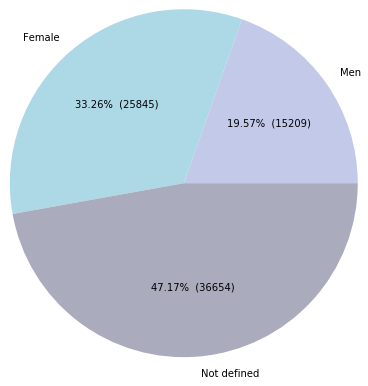

In [205]:
import matplotlib.pyplot as plt
labels = ['Men', 'Female', 'Not defined']
sizes = [male, female, guest]
colors = ['#C3C9E9', 'lightblue', '#AAABBC']
fig = plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), radius=2)
plt.show()

## <center>Определение доли безналичной оплаты</center>

Доля безналичной составила 100% для выкупленных заказов. Была проведена отдельная проверка для изначальных данных, не было ни одного чека со статусом "доставлено" и наличной оплаты.

In [184]:
cash, nocash = 0, 0
for money in data_unique["ФормаОплаты"]:
    money = str(money)
    if money == "Безналичная":
        nocash += 1
    else: 
        cash += 1
print(f"Paid using cash - {cash} times")
print(f"Paid cashless payment method - {nocash} times")

Paid using cash - 0 times
Paid cashless payment method - 77708 times


## <center>Причины отмены заказов</center>

В данном разделе рассмотрим возможные причины отмены заказов и их количество.

In [278]:
x = data_unique["ПричинаОтмены"].value_counts().keys().tolist()
counts = data_unique["ПричинаОтмены"].value_counts().tolist()
for j in range(0, len(x)):
    x[j] = x[j].replace('.','')
    for i in range(10):
        x[j] = x[j].replace(str(i),'')
    x[j] = x[j].lstrip()

print("Причины отмены заказов:")
for i in range(0, len(x)):
    print(str(i + 1) + ". " + x[i])

Причины отмены заказов:
1. Авто корректировка склада
2. Не пришел товар от поставщика
3. Нет на остатках или нет в обработке ЗПЗ
4. Не устроила дата доставки
5. Ошибка выбора, будет новый заказ
6. Другое
7. Авто корректировка ЗПЗ
8. Уже купил товар в другом месте
9. Несоотв стоимости товара или цена не устроила
10. Несоотв характеристик товара (свойства, картинка, цвет)
11. Нет нужной ассортиментной позиции (цвет, размер, тип)
12. Пересорт
13. Отказ из за переноса даты доставки
14. Форсмажор
15. Письмо об отмене
16. Тест, контрольная закупка


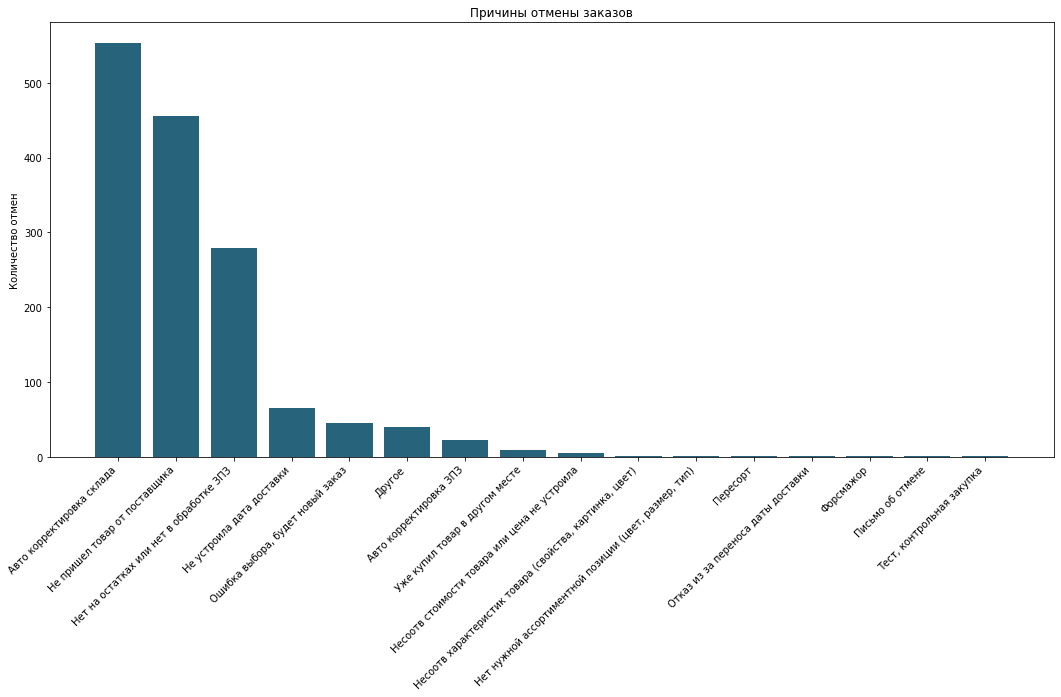

In [281]:
x_pos = [i for i, _ in enumerate(x)]
f, ax = plt.subplots(figsize=(18,8))
plt.bar(x_pos, height=counts, color="#27647C")
plt.ylabel("Количество отмен")
plt.title("Причины отмены заказов")
plt.xticks(x_pos, x)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## <center>Количество отмен выкупленных заказов</center>

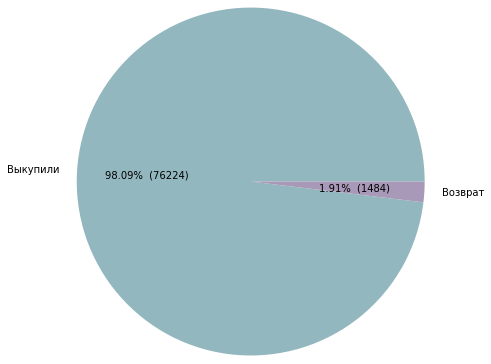

In [206]:
data_unique["Отменено"].value_counts()
x = data_unique["Отменено"].value_counts().keys().tolist()
sizes = data_unique["Отменено"].value_counts().tolist()
labels = ['Выкупили', 'Возврат']
colors = ['#93B7BE', '#A799B7']

plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), radius=2)
plt.show()

## <center>Количество заказов по регионам</center>

Видим на графике, что больше всего заказов в Москве: около 25000, существенную долю составляет Санкт-Петербург: около 5000 заказов. В Нижнем Новгороде около 4000 заказов, а в Самаре и Екатеринбурге около 2000 заказов, в остальных регионах около 1000 заказов. Регионы, в которых меньше 500 заказов на графике не указаны.

In [226]:
import numpy as np
data_unique = pd.read_csv('SAS_data_clean11.csv', sep=";", encoding='cp1251')
data_unique = data_unique.drop_duplicates(subset=["НомерЗаказаНаСайте"], keep='first') #оставили только уникальные заказы

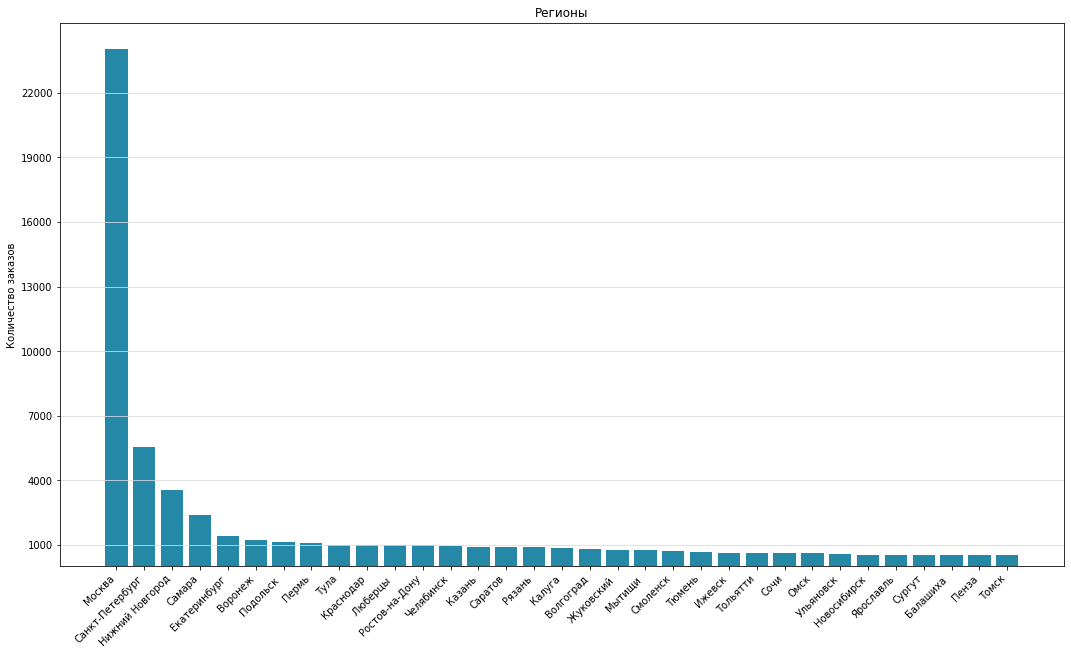

In [294]:
new_x, names = [], []
x = data_unique["Регион"].value_counts().keys().tolist()
sizes = data_unique["Регион"].value_counts().tolist()
for i in range(0, len(x)):
    if sizes[i] > 500:
        new_x.append(sizes[i])
        names.append(x[i])
x = new_x
labels = names

x_pos = [i for i, _ in enumerate(x)]
f, ax = plt.subplots(figsize=(18,10))
plt.bar(x_pos, height=x, color="#2688A7")
plt.ylabel("Количество заказов")
plt.title("Регионы")
plt.xticks(x_pos, labels)
plt.yticks(np.arange(1000, 23000, 3000))
plt.grid(axis='y', linestyle='-', color = "#D8DBE2")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## <center>Доля курьерской доставки</center>

In [5]:
data_unique.columns

Index(['Unnamed: 0', 'Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте',
       'НовыйСтатус', 'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки',
       'ФормаОплаты', 'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип',
       'Номенклатура', 'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество',
       'Цена', 'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа',
       'ГодДатыЗаказа', 'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг',
       'СуммаДоставки', 'НомерСтроки', 'КоличествоПроданоКлиенту',
       'ДатаЗаказаНаСайте', 'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент',
       'ID_SKU', 'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')

In [6]:
data_unique[""].value_counts()

Магазины    77708
Name: МетодДоставки, dtype: int64

In [7]:
data_saved = pd.read_csv('data/all_data_sas.csv', sep=";", encoding='cp1251') # open raw data file

In [8]:
data_saved["МетодДоставки"].value_counts()

Магазины                 473994
Курьерская               176851
Самовывоз                 45808
Pick point                17382
DPD                       10236
Транспортная компания      6285
Name: МетодДоставки, dtype: int64